# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [129]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [130]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [131]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [132]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [133]:
df_data = pd.read_csv('mission_launches.csv', index_col=0)

df_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)



# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [134]:
df_data.shape


(4324, 8)

In [135]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [136]:
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [137]:
df_data.count()

Unnamed: 0        4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

## Descriptive Statistics

In [138]:
df_data.describe()

,Unnamed: 0,Price
count,"4,324.00",964.00
mean,"2,161.50",153.79
std,"1,248.38",288.45
min,0.00,5.30
25%,"1,080.75",40.00
50%,"2,161.50",62.00
75%,"3,242.25",164.00
max,"4,323.00","5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [139]:
org_counts = df_data['Organisation'].value_counts()
top_20_orgs = org_counts.nlargest(20)


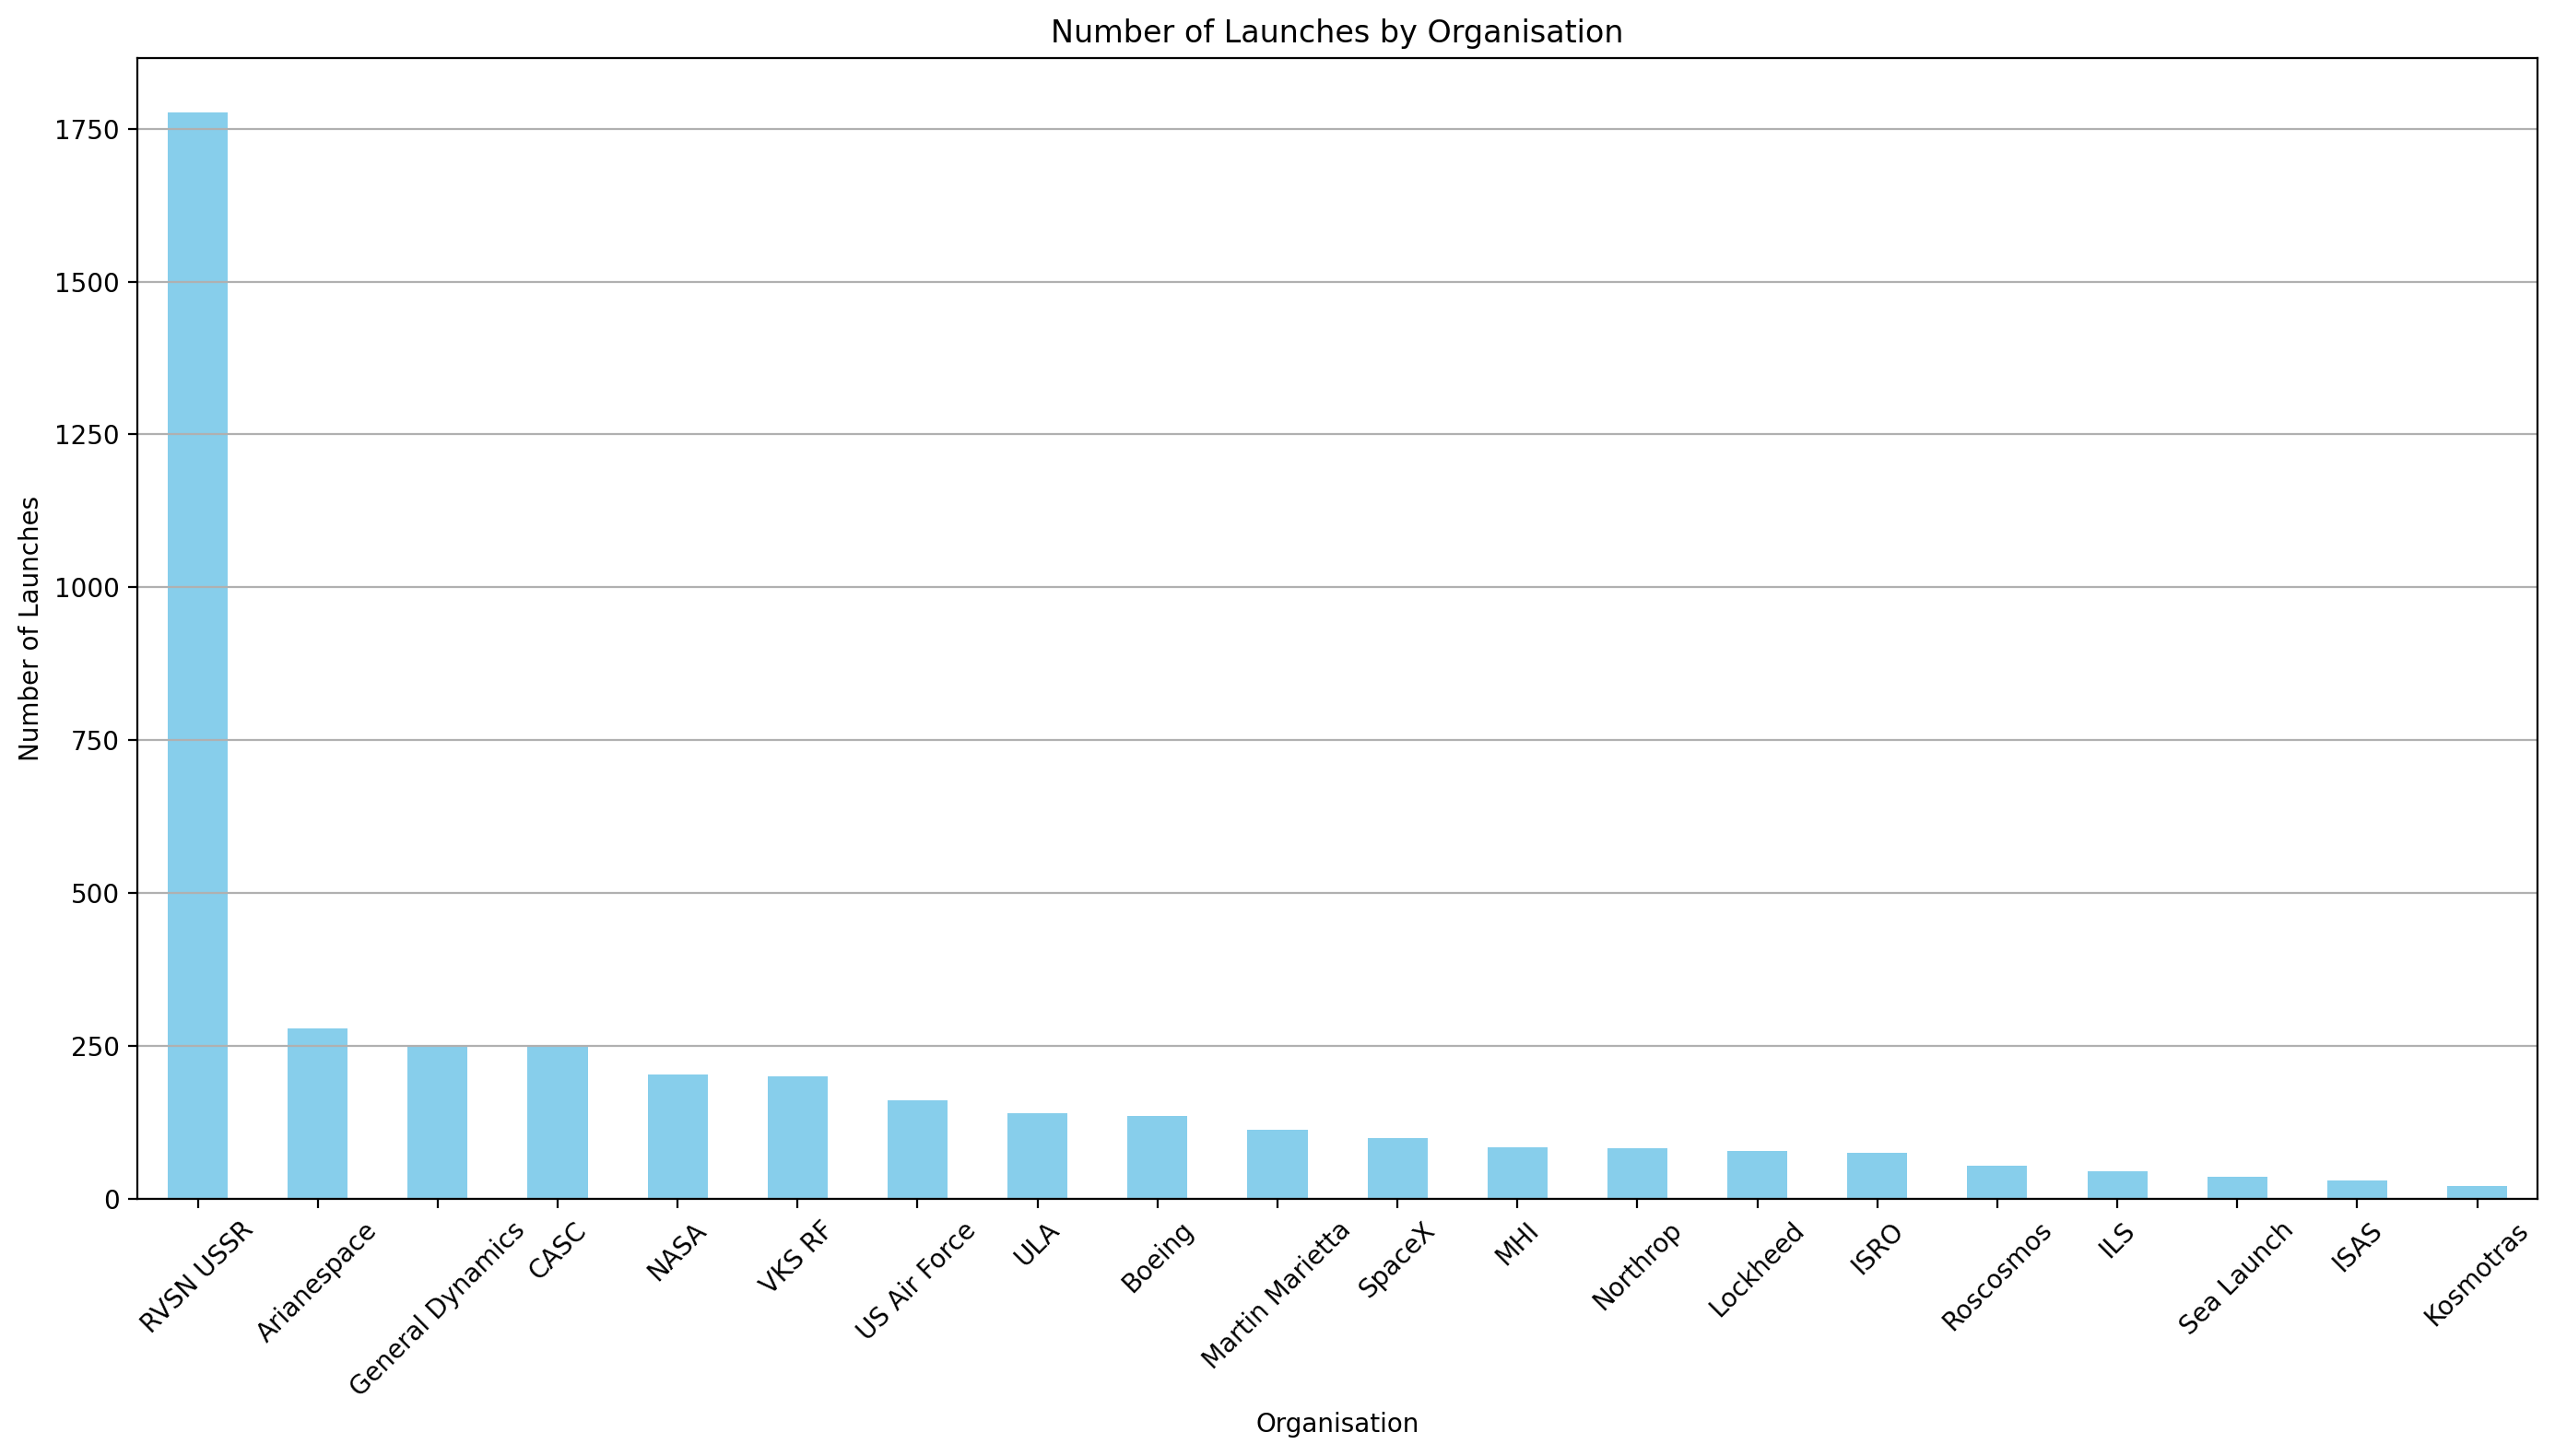

In [140]:
plt.figure(figsize=(14,8), dpi=200)
top_20_orgs.plot(kind='bar', color='skyblue')
plt.title('Number of Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [141]:
rocket_status_counts = df_data['Rocket_Status'].value_counts()


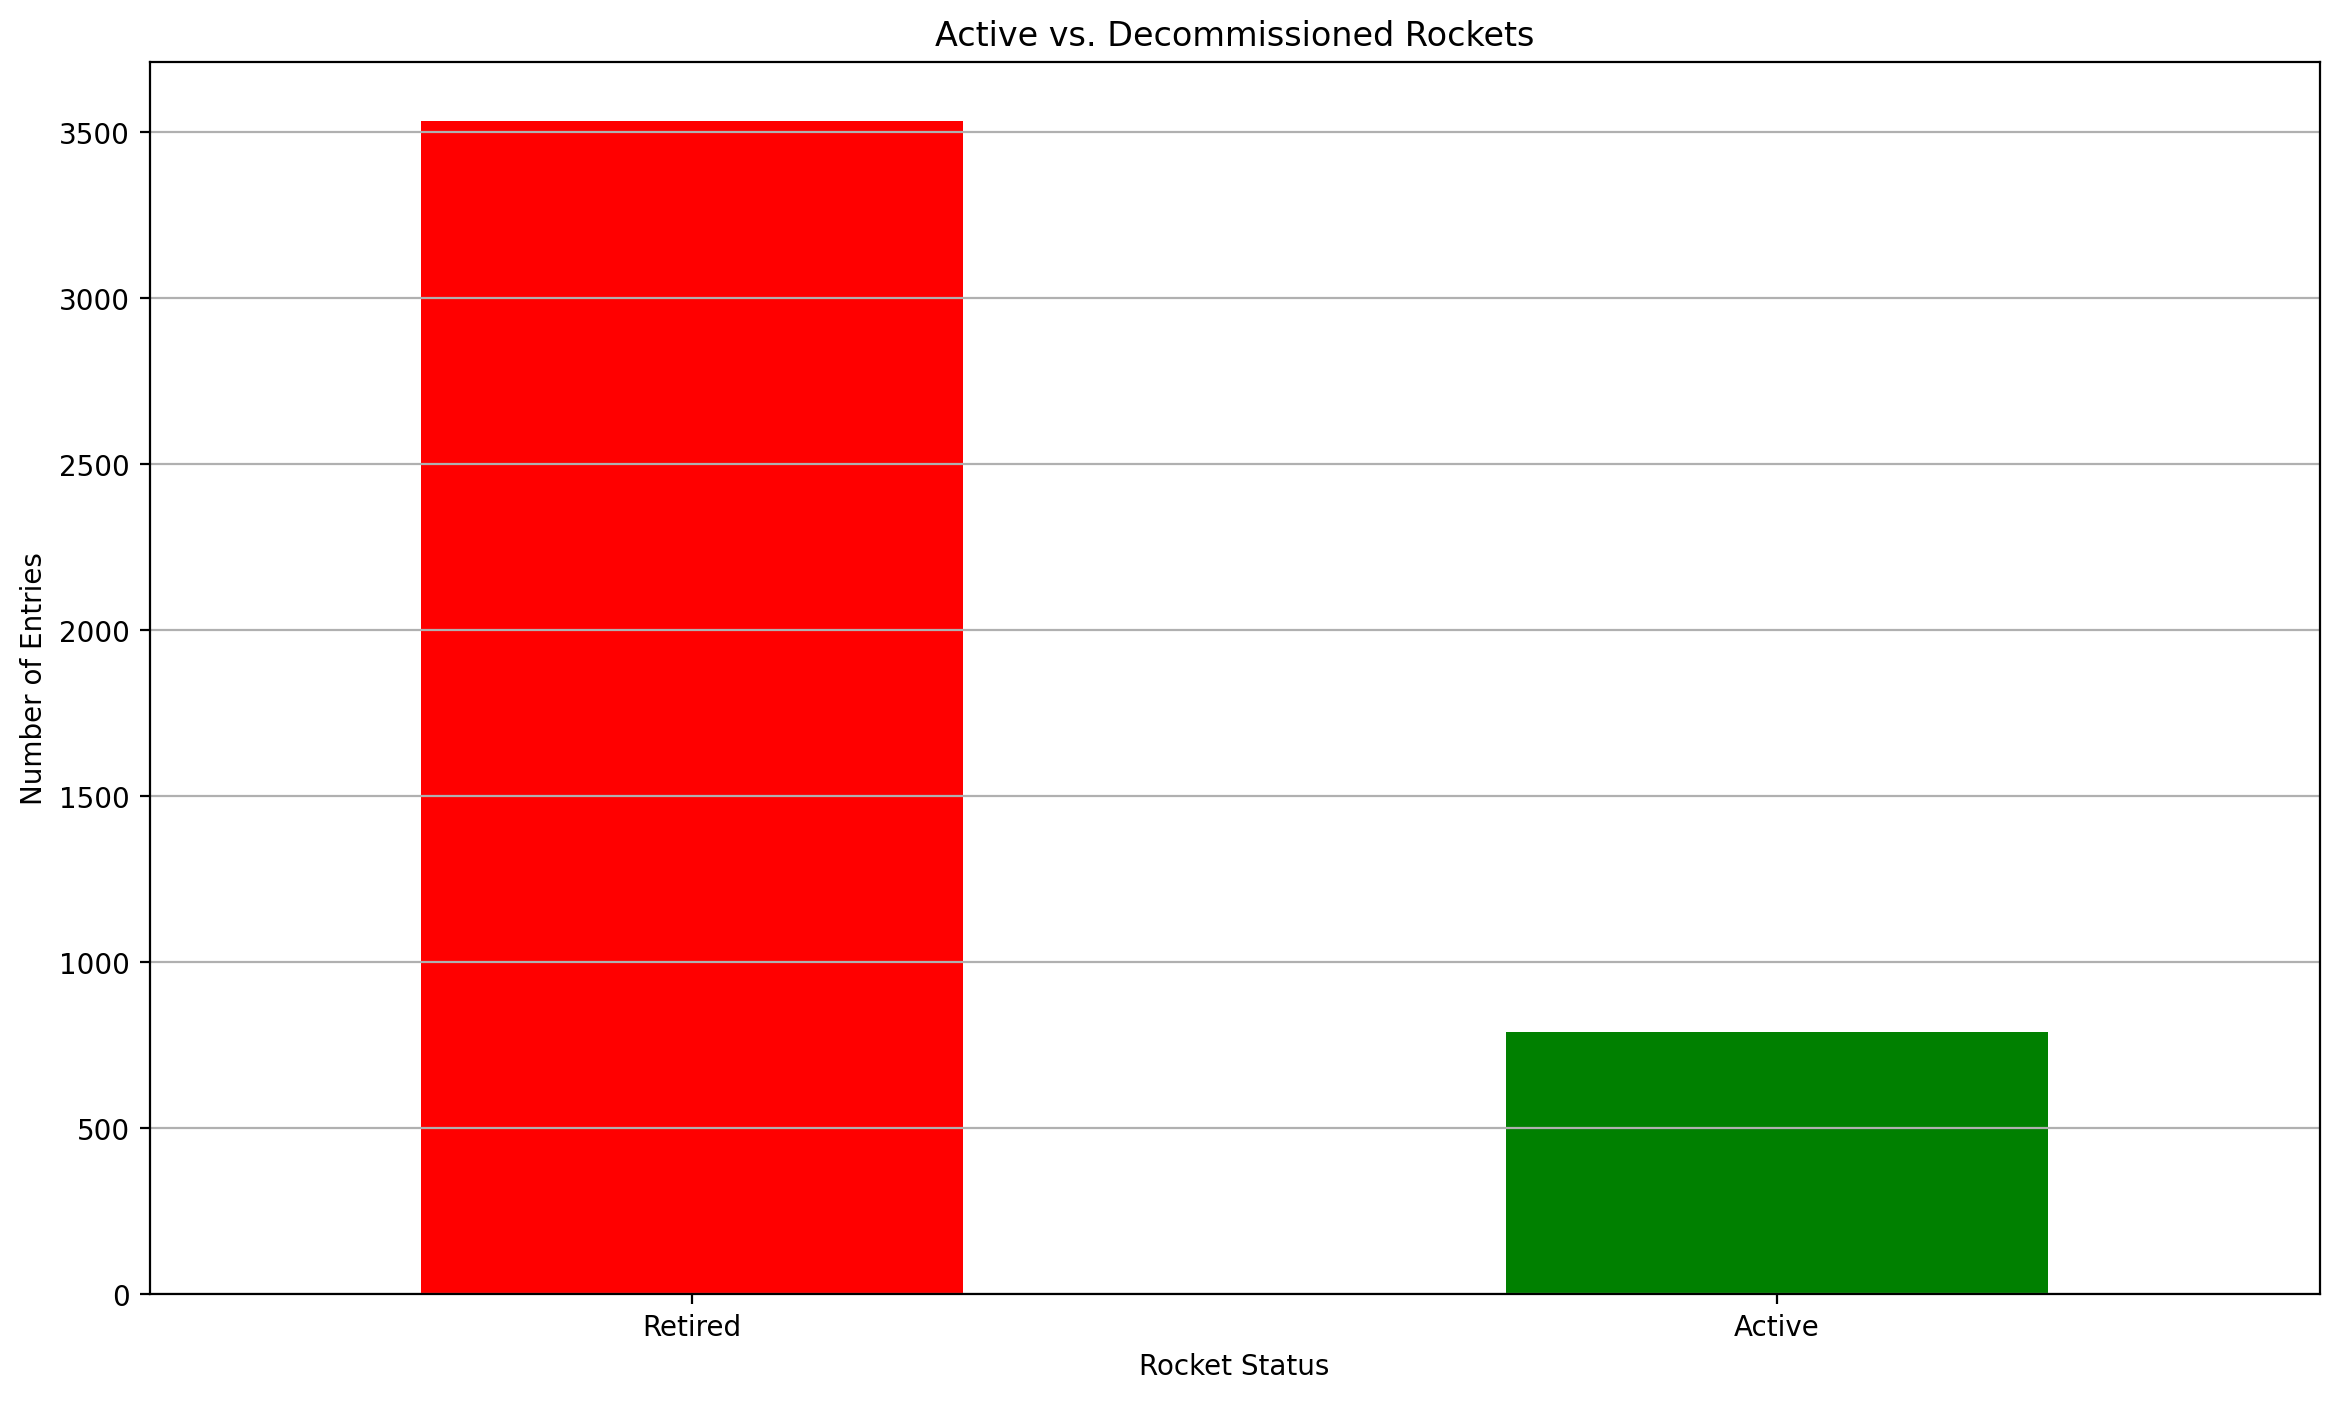

In [142]:
plt.figure(figsize=(14,8), dpi=200)
ax = rocket_status_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Active vs. Decommissioned Rockets')
plt.xlabel('Rocket Status')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
ax.set_xticklabels(['Retired', 'Active'])
plt.grid(axis='y')
#plt.tight_layout()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

Text(-3.6805555555555554, 0.5, 'Count')

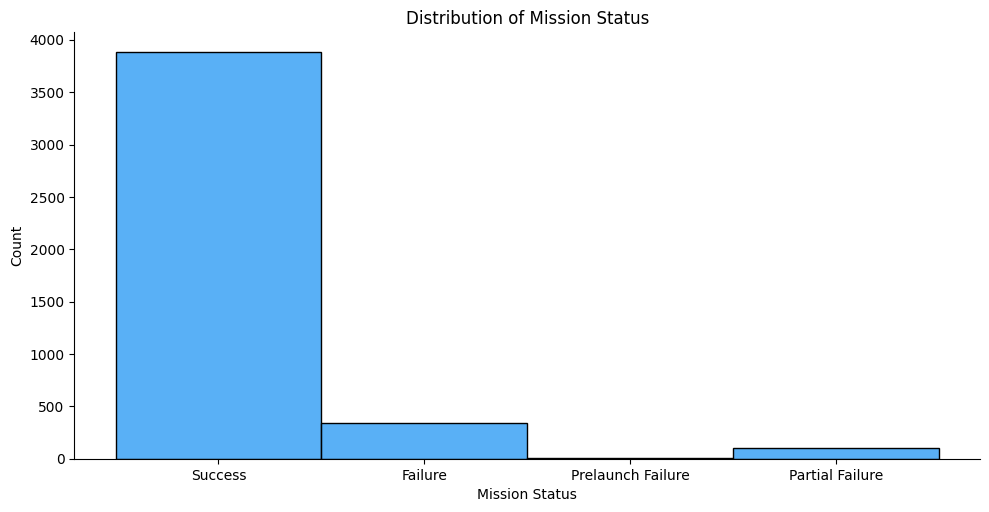

In [143]:
sns.displot(df_data['Mission_Status'],
            bins=50,
            aspect=2,
            kde=False,
            color='#2196f3')
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Count')

In [144]:

df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce', utc=True)
df_data = df_data.dropna(subset=['Date']).sort_values(by='Date', ascending=False)



In [145]:
df_data.count()

Unnamed: 0        4198
Organisation      4198
Location          4198
Date              4198
Detail            4198
Rocket_Status     4198
Price              958
Mission_Status    4198
dtype: int64

In [146]:
df_data['Year'] = df_data['Date'].dt.year.astype('Int64')
df_data['Year']


0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4198, dtype: Int64

In [147]:
df_data.count()


Unnamed: 0        4198
Organisation      4198
Location          4198
Date              4198
Detail            4198
Rocket_Status     4198
Price              958
Mission_Status    4198
Year              4198
dtype: int64

In [148]:
            
#failures_data = df_data[df_data['Mission_Status'] == 'Failure']
failures_data = df_data[df_data['Mission_Status'].str.contains('failure', case=False, regex=True)]
failures_per_year = failures_data.groupby('Year').size()

total_launches_per_year = df_data.groupby('Year').size()


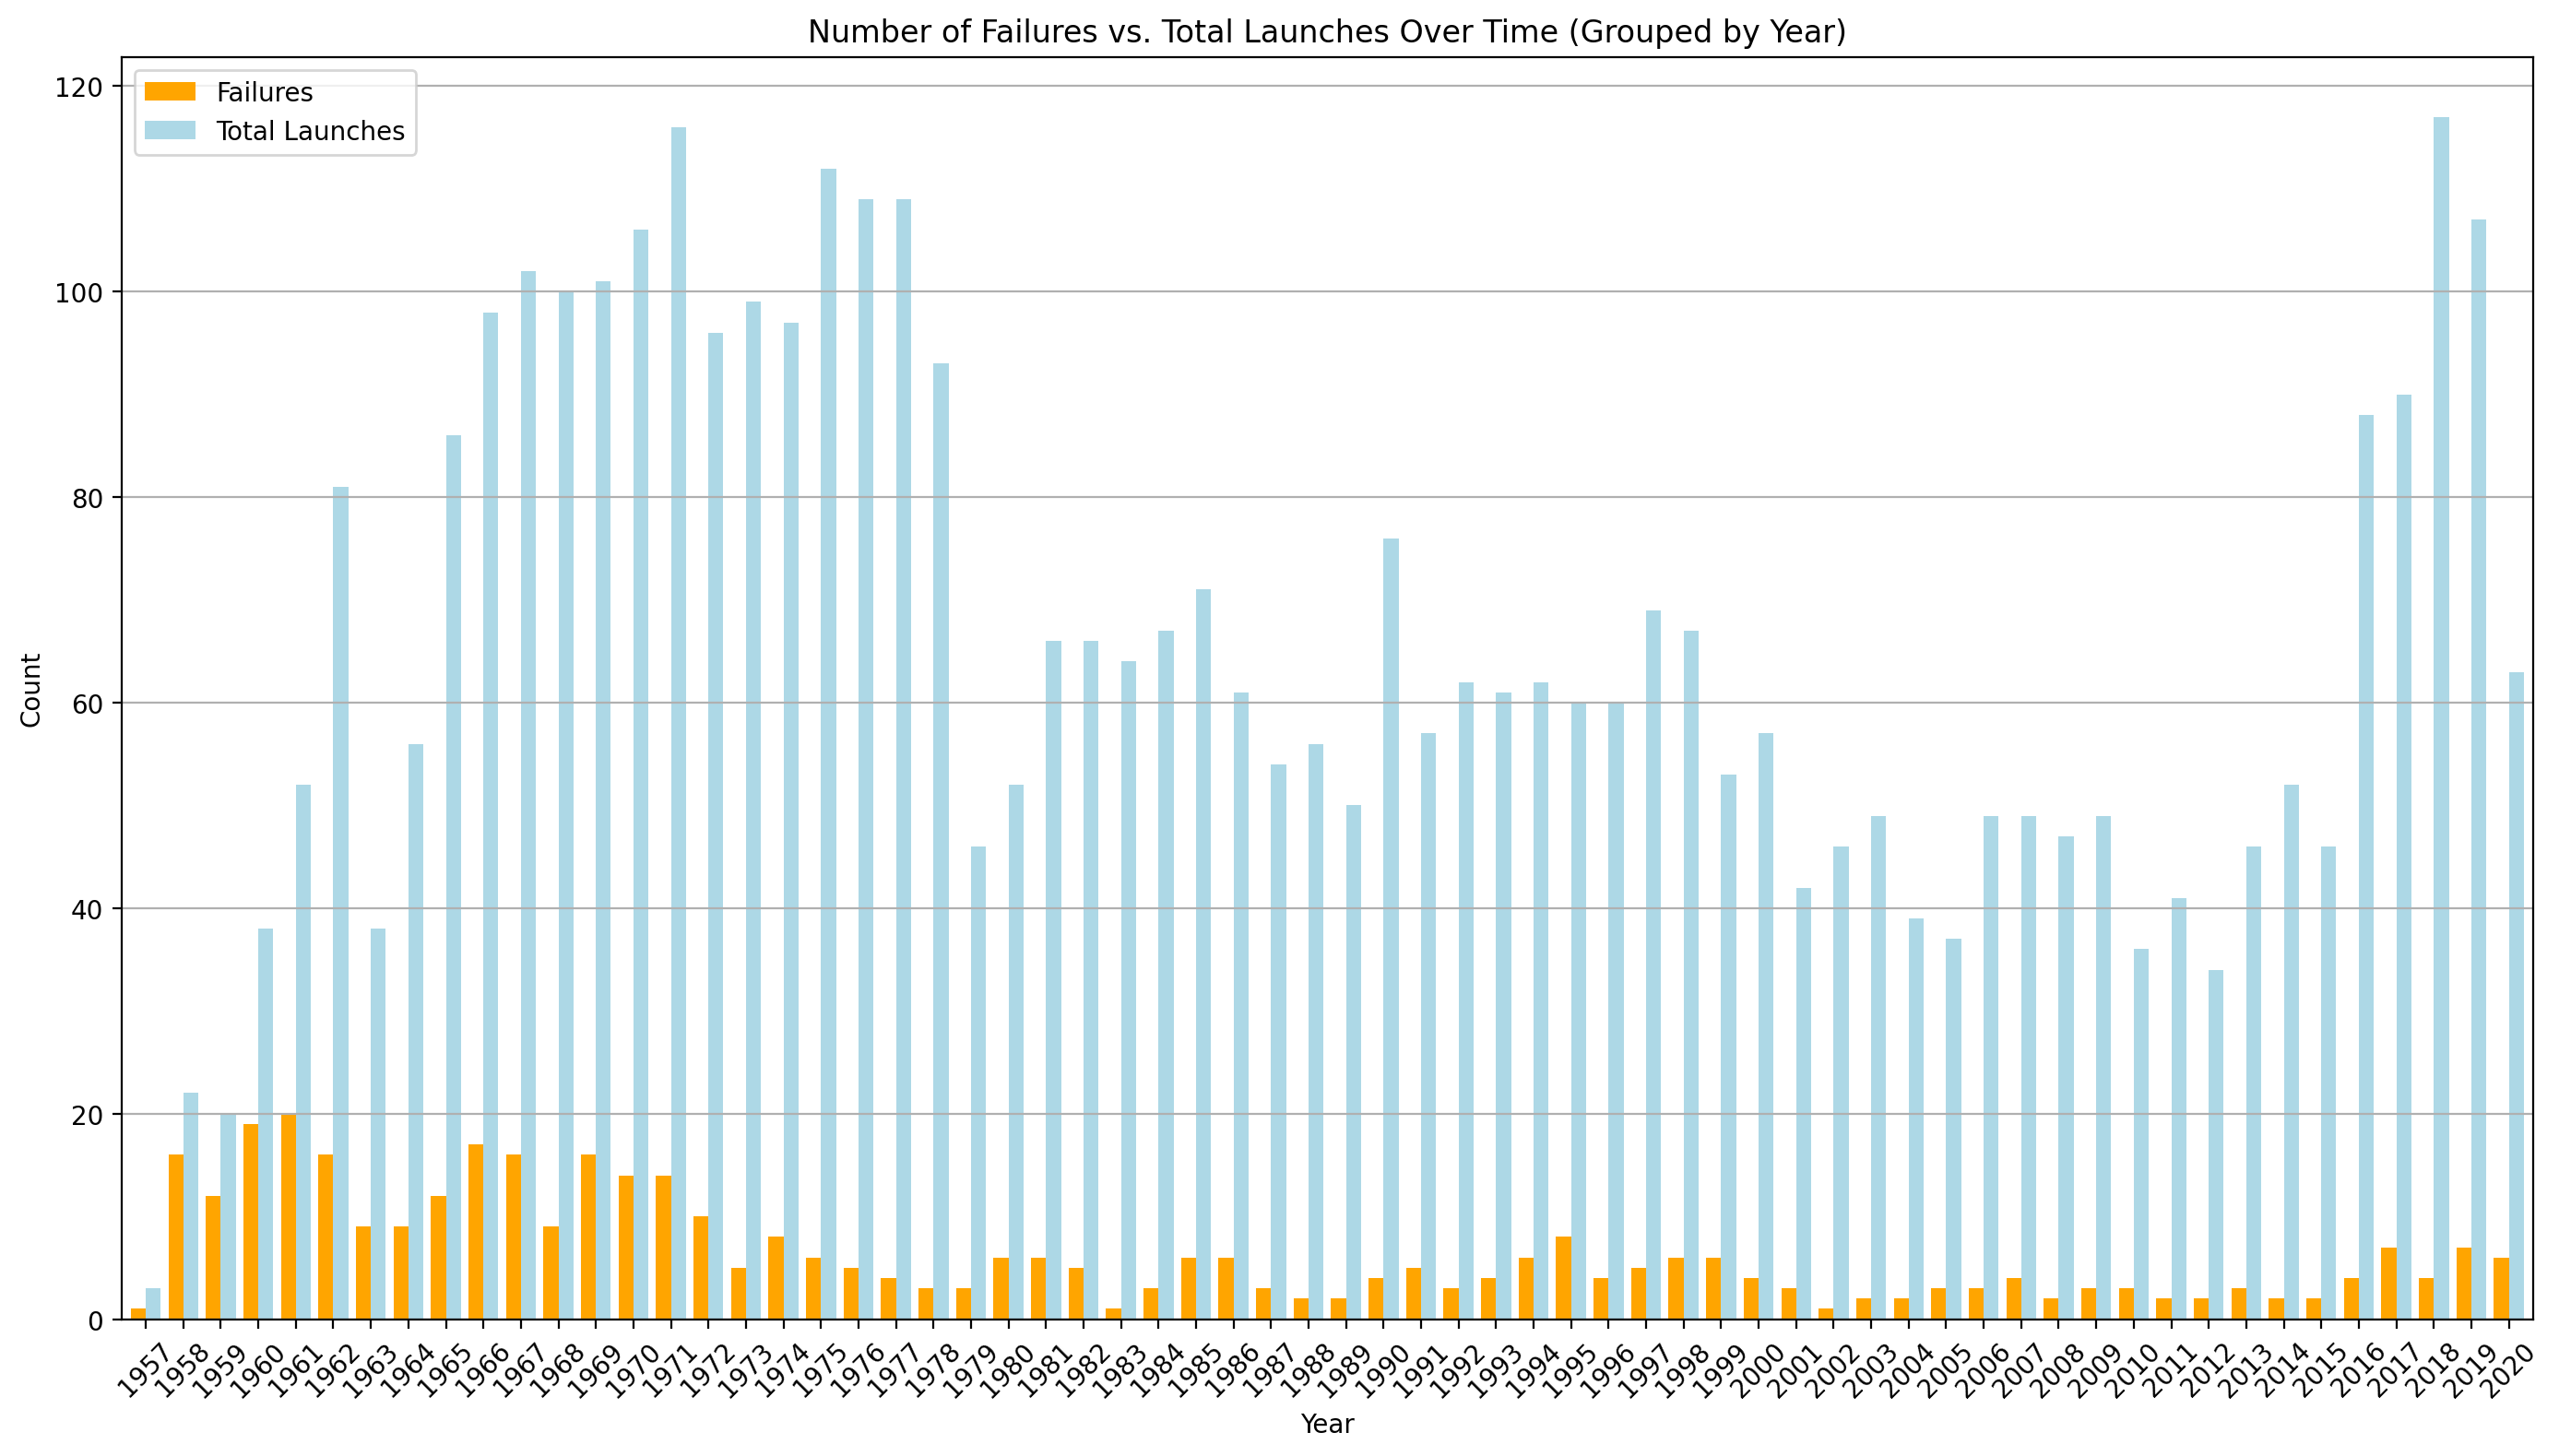

In [149]:

# Combine data so both come into the same plot and legend
data = pd.DataFrame({
    'Failures': failures_per_year,
    'Total Launches': total_launches_per_year
})

plt.figure(figsize=(14,8), dpi=200)

data.plot(kind='bar', width=0.8, ax=plt.gca(), color=['orange', 'lightblue'])

plt.title('Number of Failures vs. Total Launches Over Time (Grouped by Year)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

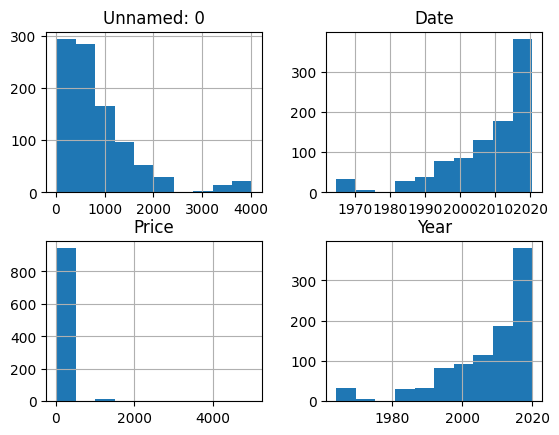

In [150]:

# Convert 'Price' column to numeric, forcing errors to NaN
# df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

df_data_priced = df_data.dropna(subset=['Price']).sort_values(by='Price', ascending=False)

df_data_priced.hist()



In [151]:
df_data.count()

Unnamed: 0        4198
Organisation      4198
Location          4198
Date              4198
Detail            4198
Rocket_Status     4198
Price              958
Mission_Status    4198
Year              4198
dtype: int64

In [152]:
df_data_priced.count()

Unnamed: 0        958
Organisation      958
Location          958
Date              958
Detail            958
Rocket_Status     958
Price             958
Mission_Status    958
Year              958
dtype: int64

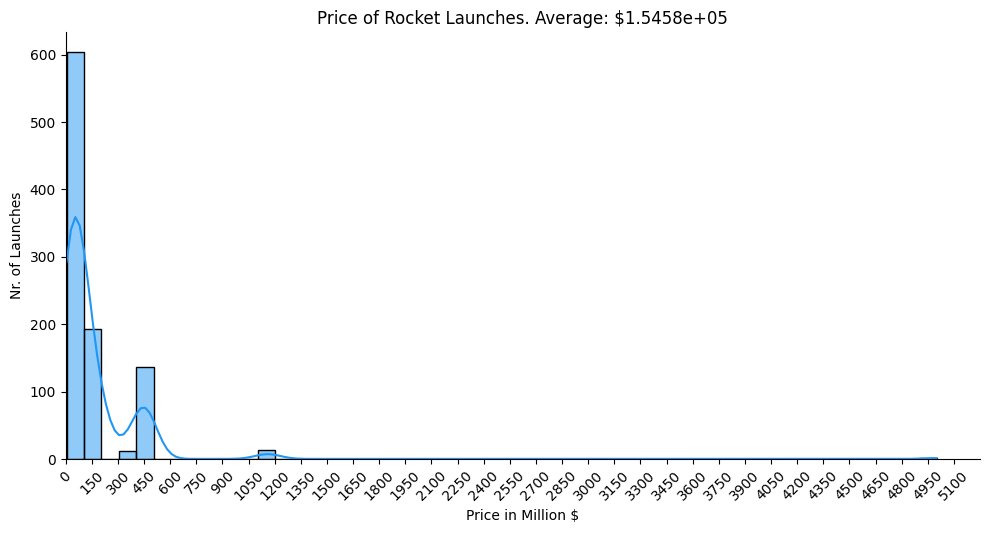

In [153]:

sns.displot(df_data_priced['Price'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'Price of Rocket Launches. Average: ${(1000*df_data_priced['Price'].mean()):.6}')
plt.xlabel('Price in Million $')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(50))  # Limit the number of x-ticks to 10
plt.xlim(left=0)  # Set the left limit of the x-axis to 0

plt.ylabel('Nr. of Launches')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [154]:
#df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(",", 1, expand = True)
#df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(", ", 1, expand=True)
df_data[['Location', 'Country']] = df_data['Location'].str.rsplit(",", n=1, expand=True)

 


In [155]:
#replace values as required
df_data['Country'].replace(
    ["Kazakhstan", "Russia", "New Mexico", "Yellow Sea", "Shahrud Missile Test Site", "Pacific Missile Range Facility", "Barents Sea", "Gran Canaria", "USA" ],
    ["Russian Federation", "Russian Federation", "United States of America", "China", "Iran", "United States of America", "Russian Federation", "United States of America", "United States of America"],
    regex=True, 
    inplace=True
     )

%pip install country_converter --upgrade
import country_converter as coco
cc = coco.CountryConverter()
df_data["Country_Code"] = cc.pandas_convert(series=df_data.Country, to='ISO3')

C:\Users\christof.kaelin@abraxas.ch\AppData\Local\Temp\ipykernel_21200\1807532706.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
 Pacific Ocean not found in regex


Note: you may need to restart the kernel to use updated packages.


In [156]:
df_data.count()

Unnamed: 0        4198
Organisation      4198
Location          4198
Date              4198
Detail            4198
Rocket_Status     4198
Price              958
Mission_Status    4198
Year              4198
Country           4198
Country_Code      4198
dtype: int64

In [157]:

%pip install --upgrade nbformat



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:


country_counts = df_data.groupby(['Country_Code', 'Country']).size().reset_index(name='Launches')

fig = px.choropleth(
    country_counts,
    locations="Country_Code",
    color="Launches",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.matter
    )
# Updating layout to fit the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [159]:
number_failure = df_data[df_data.Mission_Status != "Success"].groupby(["Country_Code", "Country"]).size().reset_index(name='Failures')


fig = px.choropleth(
    number_failure,
    locations="Country_Code",
    color="Failures",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.matter
    )
# Updating layout to fit the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [160]:
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    values=None,
    color='Mission_Status',
    color_discrete_map={'Success': 'green', 'Failure': 'red', 'Partial Failure': 'orange', 'Prelaunch Failure': 'purple'},
    title='Sunburst Chart of Mission Status by Country and Organisation'
    
)
fig.update_layout(margin=dict(t=30, l=0, r=0, b=0))
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [161]:
total_cost_by_organisation = df_data_priced.groupby('Organisation')['Price'].sum().reset_index()

total_cost_by_organisation = total_cost_by_organisation.sort_values(by='Price', ascending=False)


In [162]:

fig = px.bar(
    total_cost_by_organisation,
    x='Organisation',
    y='Price',
    title='Total Amount of Money Spent by Organisation on Space Missions',
    labels={'Cost': 'Total Cost (in Million $)'},
    )

fig.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Total Cost (in Million $)',
    xaxis_tickangle=-45,
    showlegend=False,
    width=1200,
    height=600,
    )

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [163]:
df_data_clean = df_data.dropna(subset=['Price'])
avg_cost_per_launch = df_data_clean.groupby('Organisation')['Price'].mean().reset_index()
avg_cost_per_launch = avg_cost_per_launch.sort_values(by='Price', ascending=False)
avg_cost_per_launch


,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
20,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
21,US Air Force,59.68
9,JAXA,56.00


In [164]:
fig = px.bar(
    avg_cost_per_launch,
    x='Organisation',
    y='Price',
    title='Average Cost per Launch by Organisation',
    labels={'Cost': 'Average Cost (in Million $)'},
    color='Price',
    )

fig.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Average Cost (in Million $)',
    xaxis_tickangle=-45,
    showlegend=False,
    width=1200,
    height=600,
    )

fig.show()

# Chart the Number of Launches per Year

In [165]:
total_launches_per_year = df_data.groupby('Year').size()

fig = px.line(
    total_launches_per_year,
    title='Total Number of Launches Over Time',
    labels={'index': 'Year', 'value': 'Number of Launches'},
    )
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [166]:
df_data['Month'] = df_data['Date'].dt.month
no_of_launches_per_month = df_data.groupby(['Month']).size().reset_index(name='Number_of_Launches')
moving_average = no_of_launches_per_month['Number_of_Launches'].rolling(window=5).mean()


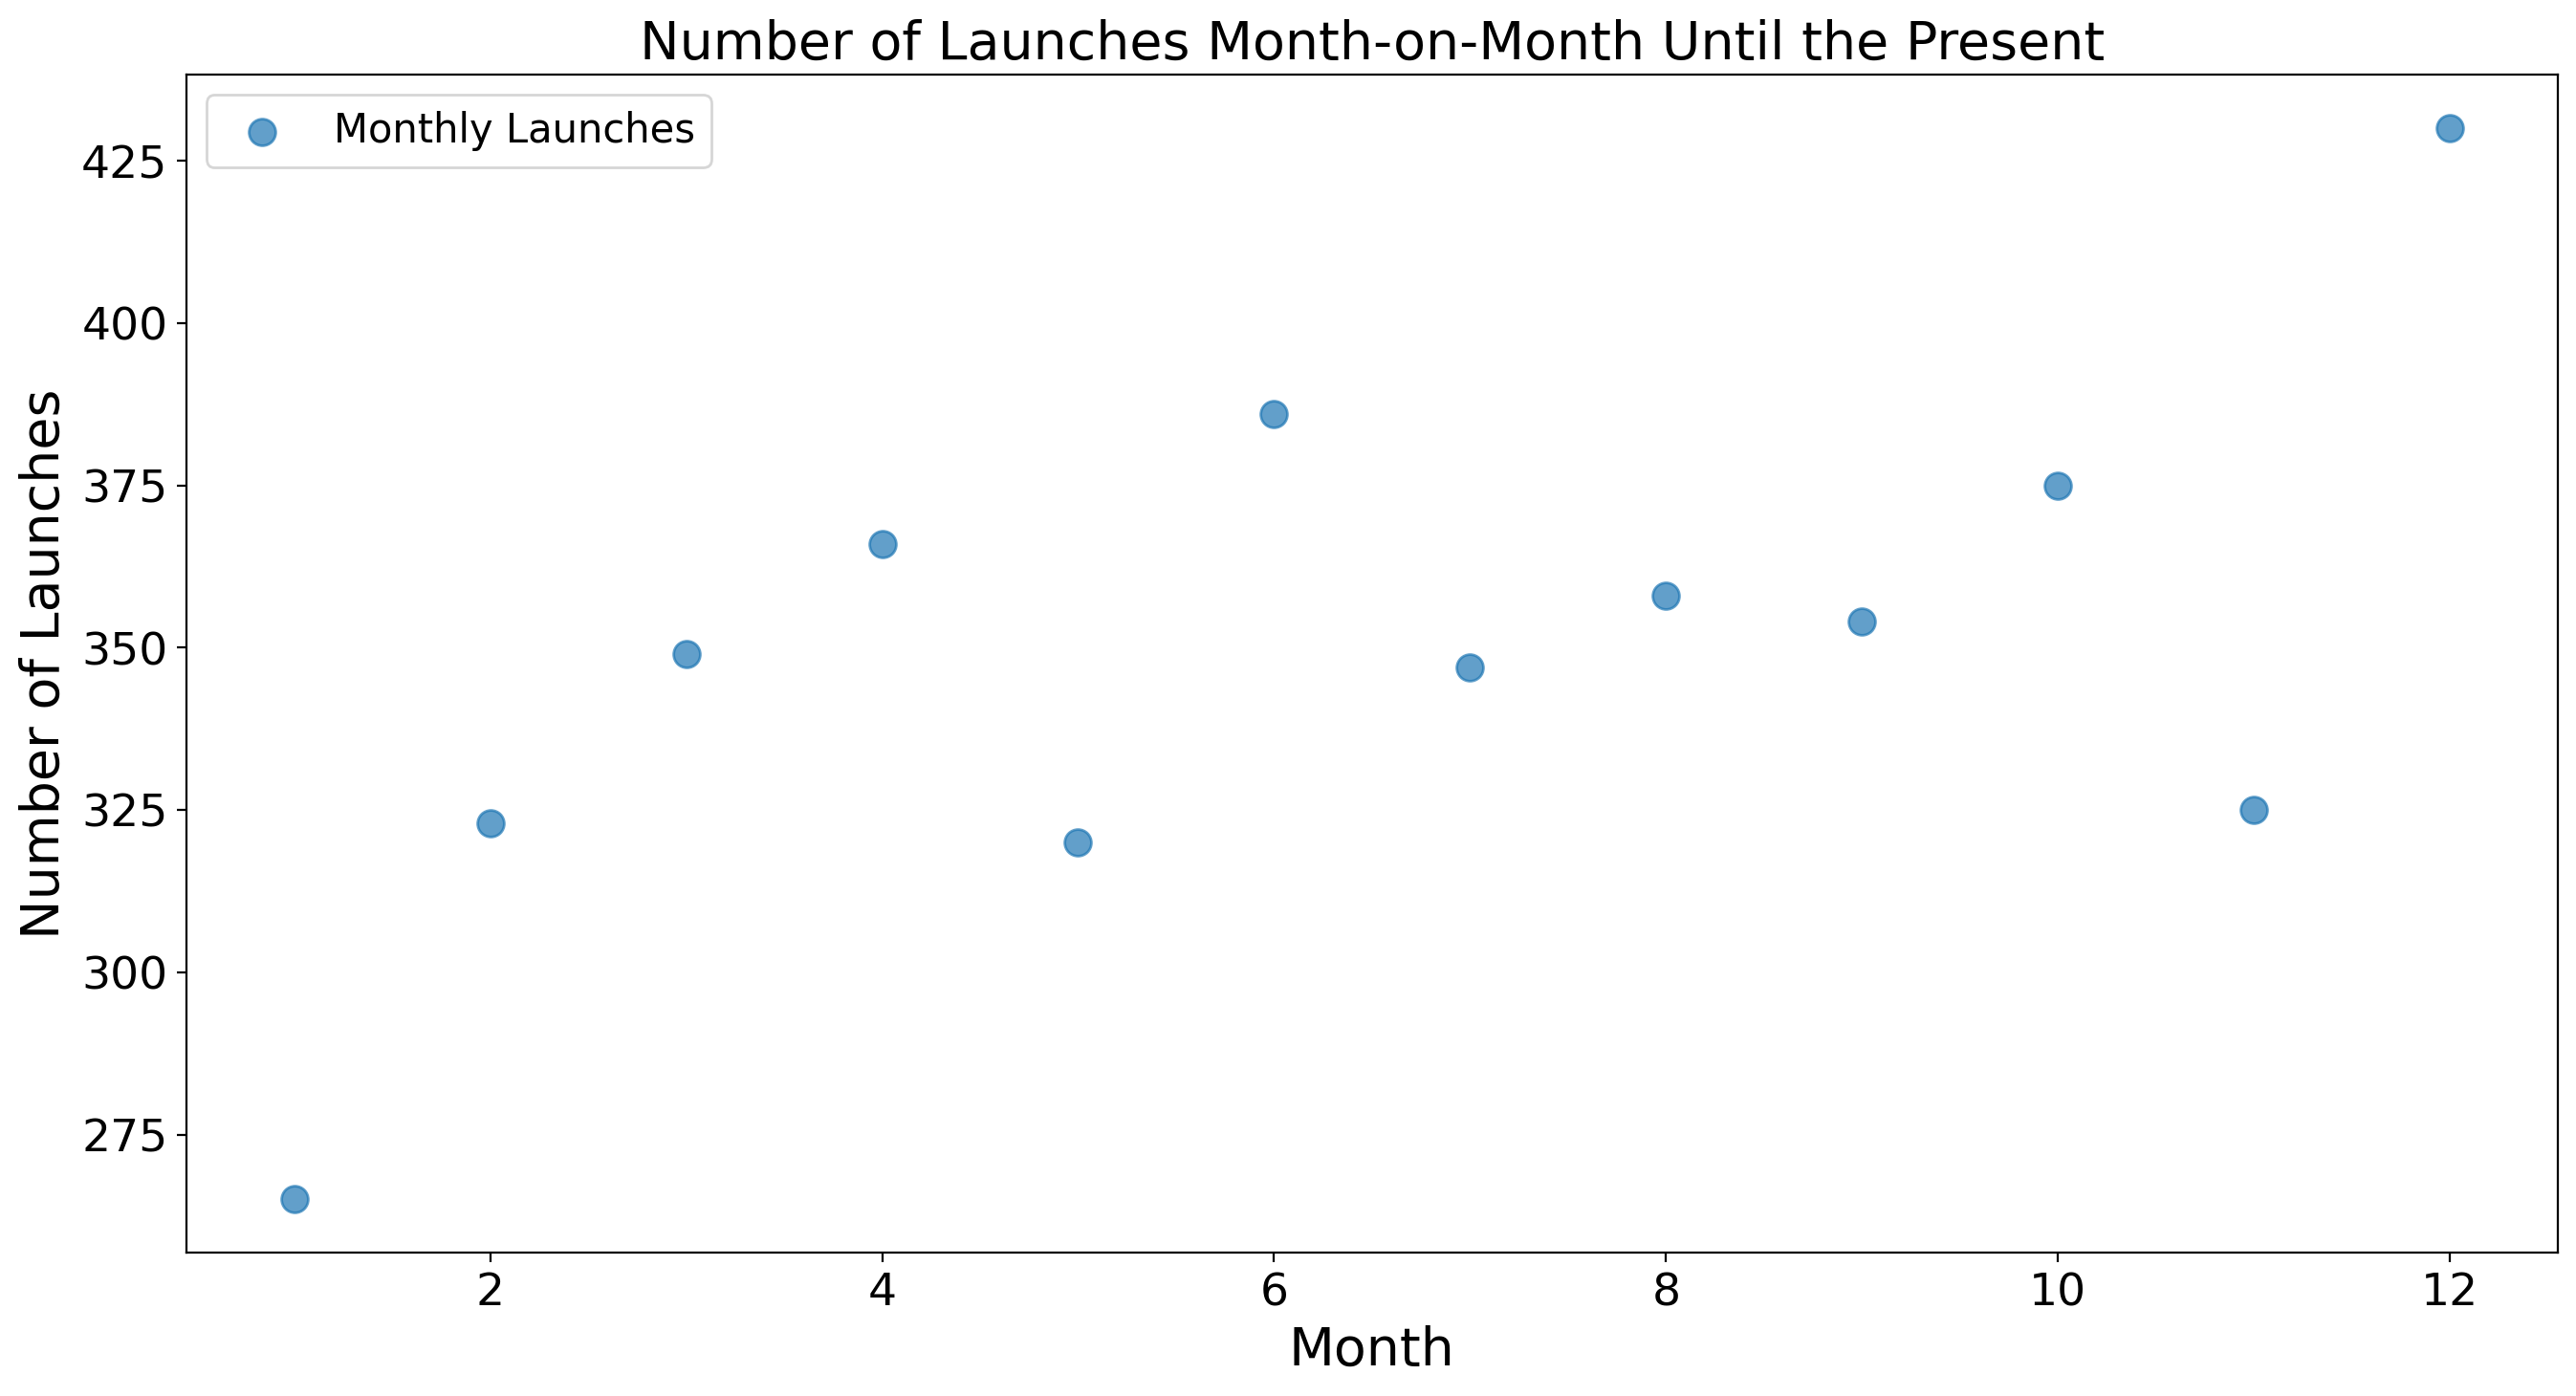

In [167]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Launches Month-on-Month Until the Present", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Number of Launches", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.scatter(no_of_launches_per_month['Month'],
            no_of_launches_per_month['Number_of_Launches'],
            alpha=0.7,
            s=100,
            label='Monthly Launches'
           )

# Plotting rolling average
""" plt.plot(no_of_launches_per_month['Month'],
         moving_average,
         color='purple',
         linewidth=3,
         label='Rolling Average (5 months)'
         ) """

plt.legend(fontsize=15)

plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [168]:
no_of_launches_per_month.max()

Month                  12
Number_of_Launches    430
dtype: int64

In [169]:
no_of_launches_per_month.min()

Month                   1
Number_of_Launches    265
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [170]:

df_data_priced = df_data_priced.sort_values(by='Date')
df_data_priced['Moving_Avg'] = df_data_priced['Price'].rolling(window=5).mean()


fig = px.line(
    df_data_priced,
    x='Date',
    y='Price',
    title='Variation in Launch Price Over Time',
    labels={'Price': 'Launch Price'},
    markers=True
)

fig.add_scatter(
    x=df_data_priced['Date'],
    y=df_data_priced['Moving_Avg'],
    mode='lines',
    name='5-Month Moving Average',
    line=dict(color='orange', width=2)
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Launch Price (in your currency)',
    xaxis_tickformat='%Y-%m',
    height=600,
    width=1200
)

fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [171]:
launches_per_org = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')
top_orgs = launches_per_org.groupby('Organisation')['Launches'].sum().nlargest(10).index
filtered_data = launches_per_org[launches_per_org['Organisation'].isin(top_orgs)]


In [172]:
fig = px.line(
    filtered_data,
    x='Year',
    y='Launches',
    color='Organisation',
    title='Number of Launches Over Time by Top 10 Organisations',
    labels={'Launches': 'Number of Launches'},
    markers=True
)

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    xaxis_tickformat='%Y-%m',
    height=600,
    width=1200
)

# Show the figure
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [202]:
filtered_data = df_data[df_data['Year'] <= 1991]
filtered_data = filtered_data[filtered_data['Country_Code'].isin(['USA', 'RUS'])]
total_launches_by_country = filtered_data.groupby('Country').size().reset_index(name='Total_Launches')
total_launches_by_country

,Country,Total_Launches
0,Russian Federation,1709
1,United States of America,644


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [203]:
total_launches_by_country = filtered_data.groupby('Country').size().reset_index(name='Total_Launches')

fig = px.pie(
    total_launches_by_country,
    names='Country',
    values='Total_Launches',
    title='Comparison of Total Number of Launches: USA vs. USSR (1957-1991)',
    labels={'Total_Launches': 'Total Number of Launches'}
)

# Customize layout
fig.update_layout(
    height=600,
    width=800,
    legend_title='Country',
    legend=dict(
        x=1.05,  # Adjusts position of the legend
        y=0.5,
        traceorder='normal',
        orientation='v'
    )
)

# Show the figure
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [204]:
filtered_data = filtered_data.groupby(['Year', 'Country']).size().reset_index(name='Launches')


In [205]:

fig = px.line(
    filtered_data,
    x='Year',
    y='Launches',
    color='Country',
    title='Number of Launches during the Cold War by USA and Russia',
    labels={'Launches': 'Number of Launches'},
    markers=True
)

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    xaxis_tickformat='%Y-%m',
    height=600,
    width=1200
)

# Show the figure
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
#failures_data = df_data[df_data['Mission_Status'] == 'Failure']
failures_data = df_data[df_data['Mission_Status'].str.contains('failure', case=False, regex=True)]
failures_per_year = failures_data.groupby('Year').size()



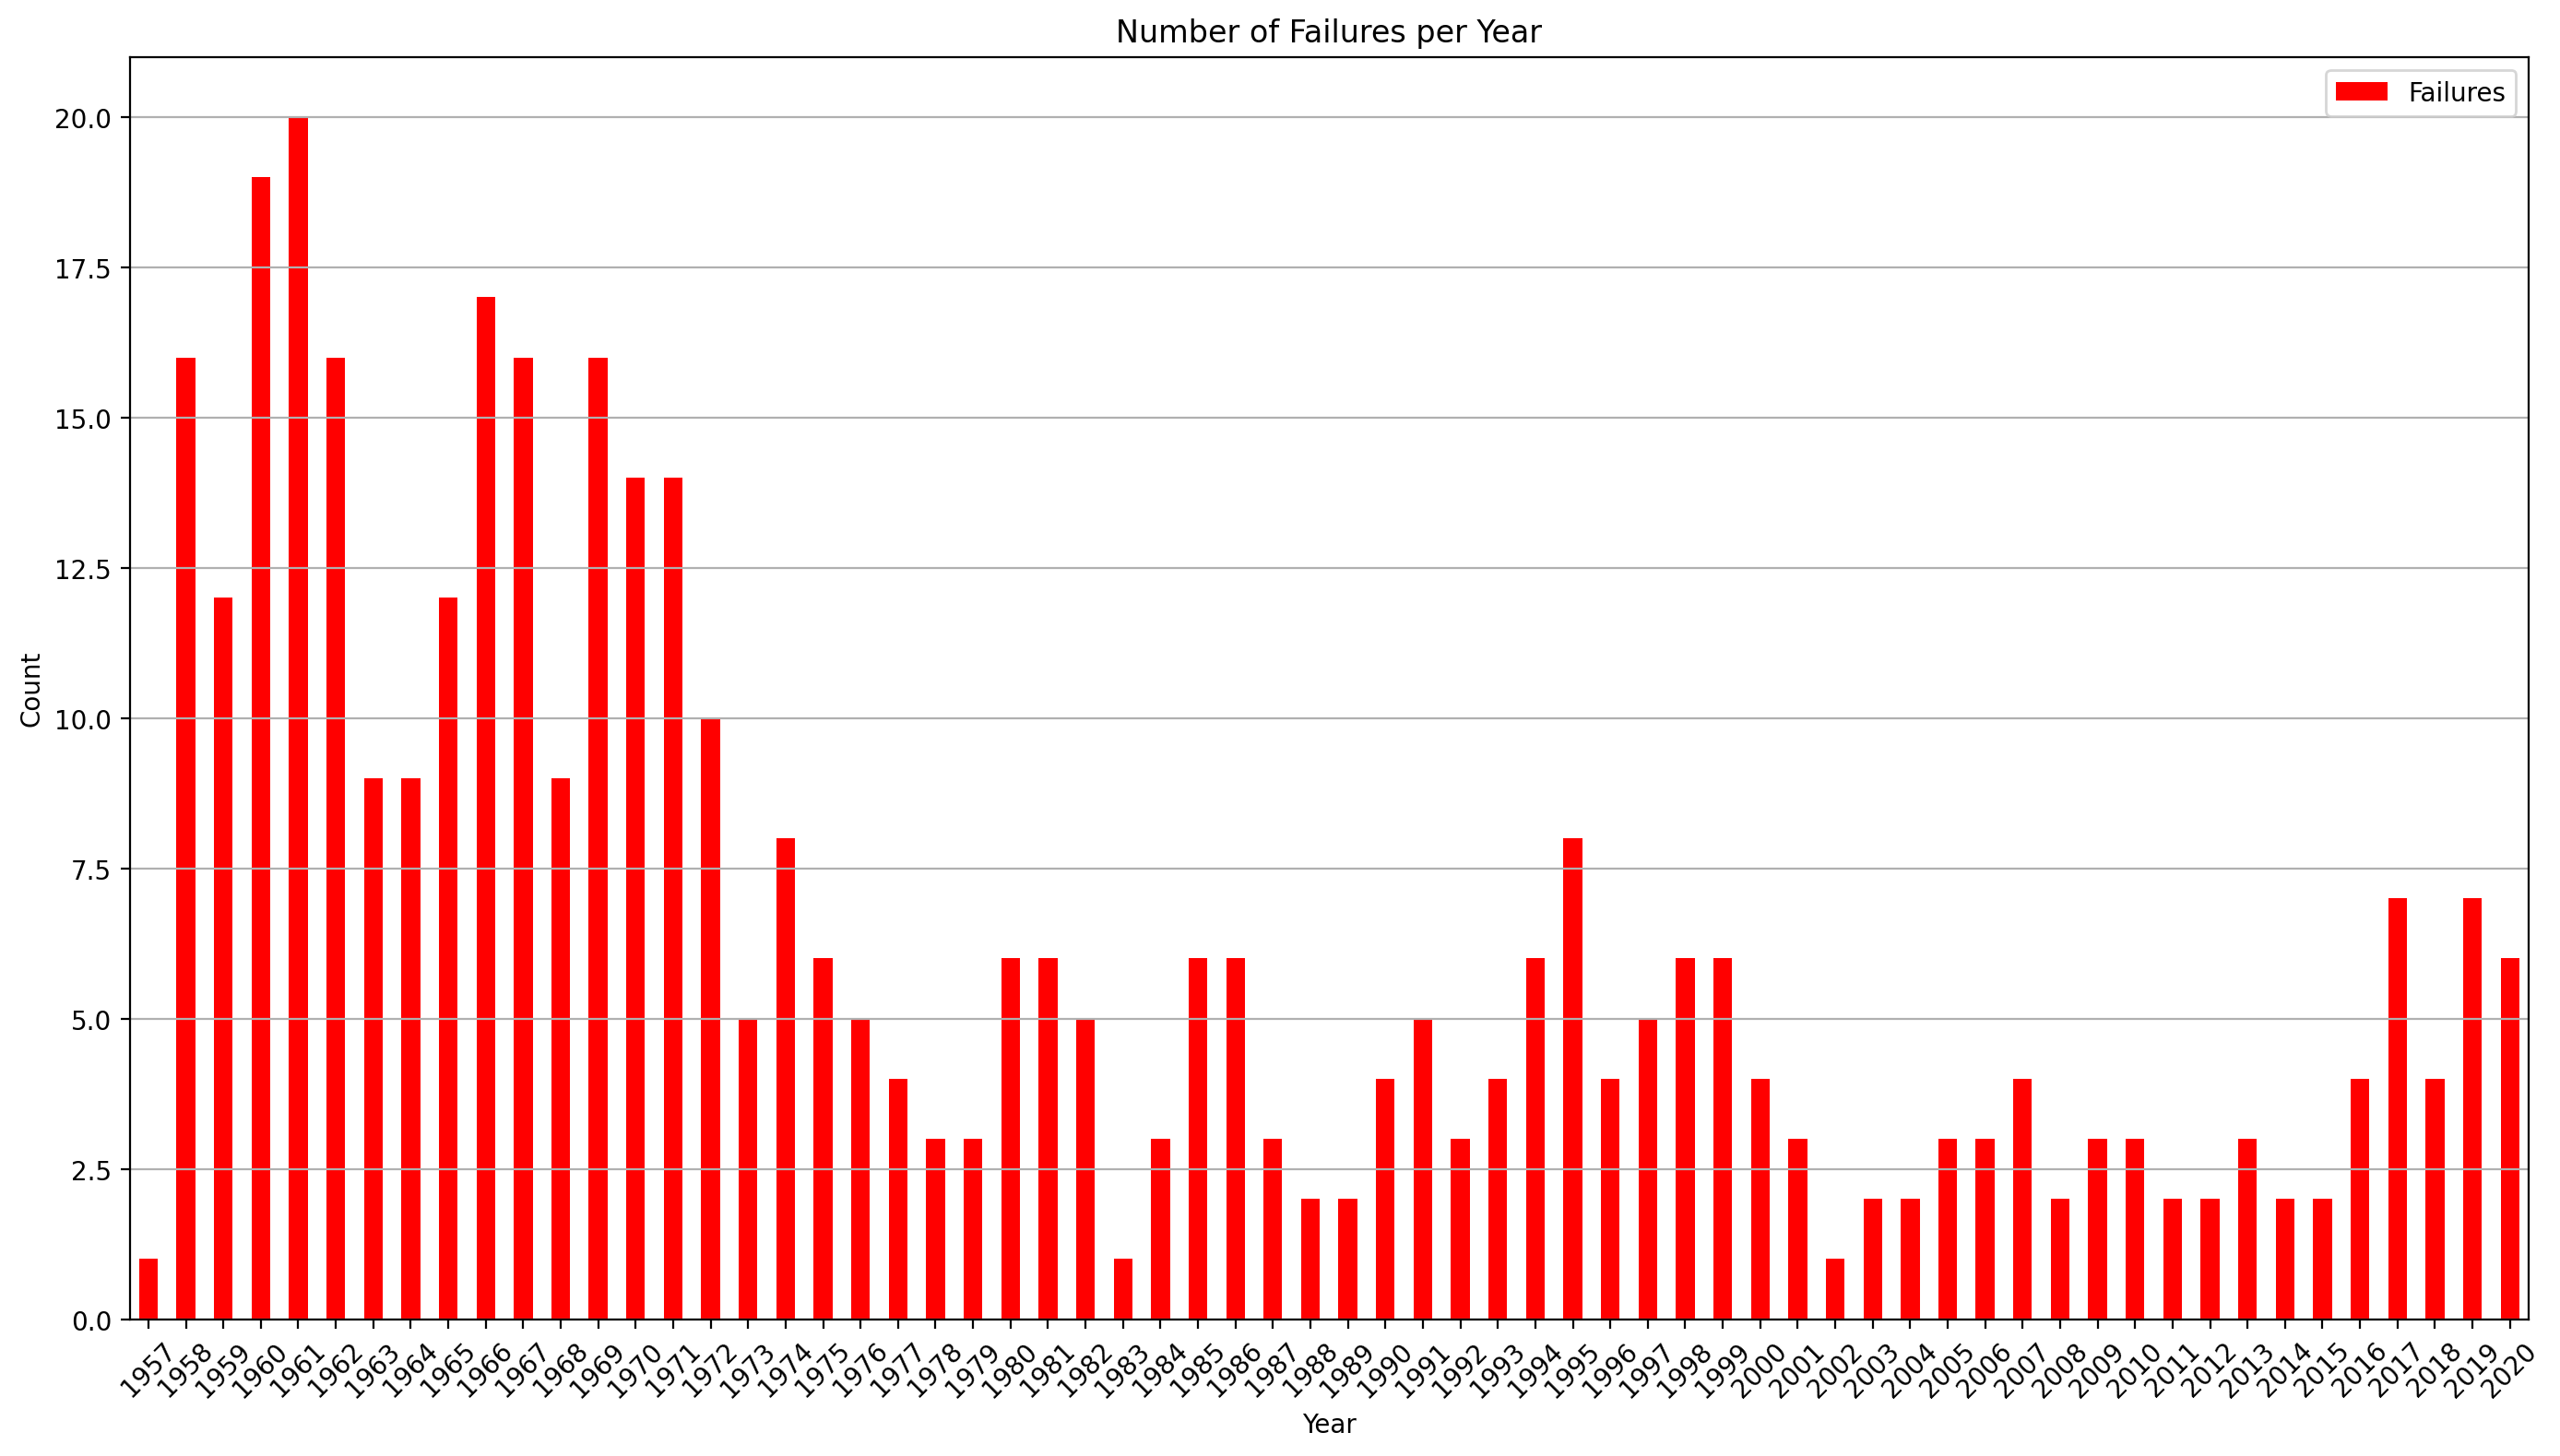

In [211]:


plt.figure(figsize=(14,8), dpi=200)

failures_per_year.plot(kind='bar', ax=plt.gca(), color='red', label='Failures')

plt.title('Number of Failures per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [219]:
failures_data = df_data[df_data['Mission_Status'].str.contains('failure', case=False, regex=True)]
failures_data = failures_data[failures_data['Country_Code'].isin(['USA', 'RUS'])]

failures_per_year_country = failures_data.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Failures')


In [220]:
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Number of Failures',
    xaxis_tickformat='%Y',
    barmode='stack',  # This ensures the bars are stacked
    height=600,
    width=1200
)

# Show the figure
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [235]:
launches_per_year_country = df_data.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Launches')
leading_country_per_year = launches_per_year_country.loc[launches_per_year_country.groupby('Year')['Total_Launches'].idxmax()]


In [237]:
fig = px.bar(
    leading_country_per_year,
    x='Year',
    y='Total_Launches',
    color='Country_Code',
    title='Leading Country in Terms of Total Number of Launches (Up to and Including 2020)',
    labels={'Total_Launches': 'Total Number of Launches'},
)

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Number of Launches',
    xaxis_tickformat='%Y',
    height=600,
    width=1200,
)

# Show the figure
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [238]:
launches_per_year_organisation = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Total_Launches')
leading_organisation_per_year = launches_per_year_organisation.loc[launches_per_year_organisation.groupby('Year')['Total_Launches'].idxmax()]

In [239]:
fig = px.bar(
    leading_organisation_per_year,
    x='Year',
    y='Total_Launches',
    color='Organisation',
    title='Leading Country in Terms of Total Number of Launches (Up to and Including 2020)',
    labels={'Total_Launches': 'Total Number of Launches'},
)

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Number of Launches',
    xaxis_tickformat='%Y',
    height=600,
    width=1200,
)

# Show the figure
fig.show()